In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization

# Summary Stats

## Exploratory Data Analysis

In [4]:
# read in marvel_movies.csv
marvel_movies = pd.read_csv('marvel_movies.csv')
marvel_movies.head()

,film,category,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year,source
0,Ant-Man,Ant-Man,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.7%,65.3%,43.8%,2015,https://www.the-numbers.com/movie/Ant-Man#tab=...
1,Ant-Man & The Wasp,Ant-Man,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.7%,65.2%,58.3%,2018,https://www.the-numbers.com/movie/Ant-Man-and-...
2,Avengers: Age of Ultron,Avengers,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.9%,67.1%,52.3%,2015,https://www.the-numbers.com/movie/Avengers-Age...
3,Avengers: End Game,Avengers,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.7%,69.3%,89.3%,2019,https://www.the-numbers.com/movie/Avengers-End...
4,Avengers: Infinity War,Avengers,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.1%,66.8%,85.7%,2018,https://www.the-numbers.com/movie/Avengers-Inf...


In [65]:
marvel_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   film                            30 non-null     object        
 1   category                        30 non-null     object        
 2   worldwide gross ($m)            30 non-null     int64         
 3   % budget recovered              30 non-null     object        
 4   critics % score                 30 non-null     object        
 5   audience % score                30 non-null     object        
 6   audience vs critics % deviance  30 non-null     object        
 7   budget                          30 non-null     float64       
 8   domestic gross ($m)             30 non-null     int64         
 9   international gross ($m)        30 non-null     int64         
 10  opening weekend ($m)            30 non-null     float64       
 11  second w

In [12]:
print(f'Rows: {marvel_movies.shape[0]}')
print(f'Columns: {marvel_movies.shape[1]}')

Rows: 30
Columns: 19


In [5]:
marvel_movies.describe()

,worldwide gross ($m),budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),% gross from opening weekend,year
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,940.866667,199.283333,370.900000,569.433333,136.770000,57.390000,38.070000,2016.266667
std,563.119068,63.656362,193.394603,387.182634,71.790822,30.440154,5.439457,4.176563
min,265.000000,130.000000,134.000000,130.000000,55.000000,22.100000,23.700000,2008.000000
25%,594.000000,161.250000,218.000000,315.500000,81.475000,35.150000,35.000000,2013.250000
50%,810.000000,183.000000,333.500000,448.500000,119.500000,48.900000,37.800000,2017.000000
75%,1146.250000,200.000000,422.250000,731.250000,180.500000,71.350000,41.925000,2019.000000
max,2797.000000,400.000000,858.000000,1939.000000,357.000000,147.000000,48.600000,2022.000000


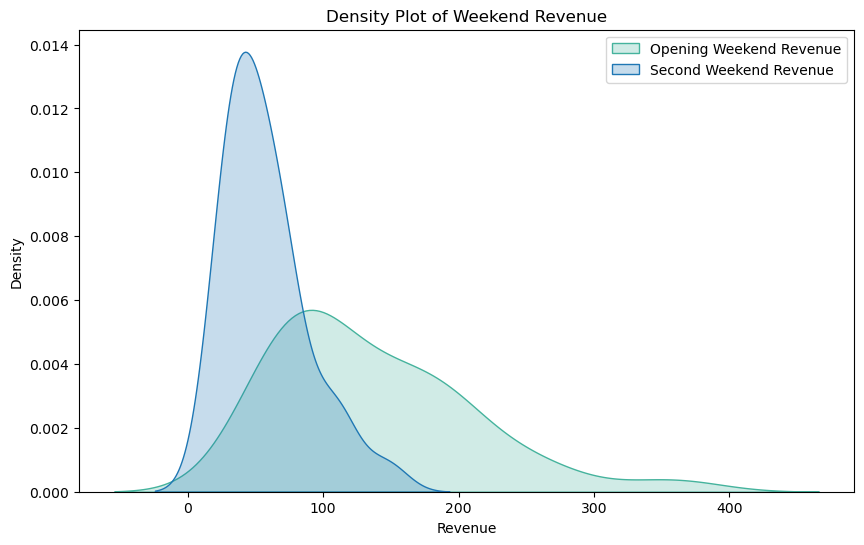

In [20]:
# weekend revenue
plt.figure(figsize=(10, 6))

# Plot the density for opening weekend revenue
sns.kdeplot(marvel_movies['opening weekend ($m)'], fill=True, label='Opening Weekend Revenue', color = '#45b39d')

# Overlay the density for second weekend revenue
sns.kdeplot(marvel_movies['second weekend ($m)'], fill=True, label='Second Weekend Revenue')

plt.title('Density Plot of Weekend Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

In [23]:
# create a new column containing the exact release date
release_dates = pd.to_datetime([
    '2015-07-17', '2018-07-06', '2015-05-01', '2019-04-26', '2018-04-27', '2018-02-16',
    '2022-11-11', '2021-07-09', '2011-07-22', '2016-05-06', '2014-04-04', '2019-03-08',
    '2016-11-04', '2022-05-06', '2021-11-05', '2014-08-01', '2017-05-05', '2008-06-13',
    '2008-05-02', '2010-05-07', '2013-05-03', '2021-09-03', '2019-07-02', '2017-07-07',
    '2021-12-17', '2012-05-04', '2013-11-08', '2022-07-08', '2017-11-03', '2011-05-06'
])

# Append the 'Release Date' column to the 'marvel_movies' DataFrame
marvel_movies['release date'] = release_dates

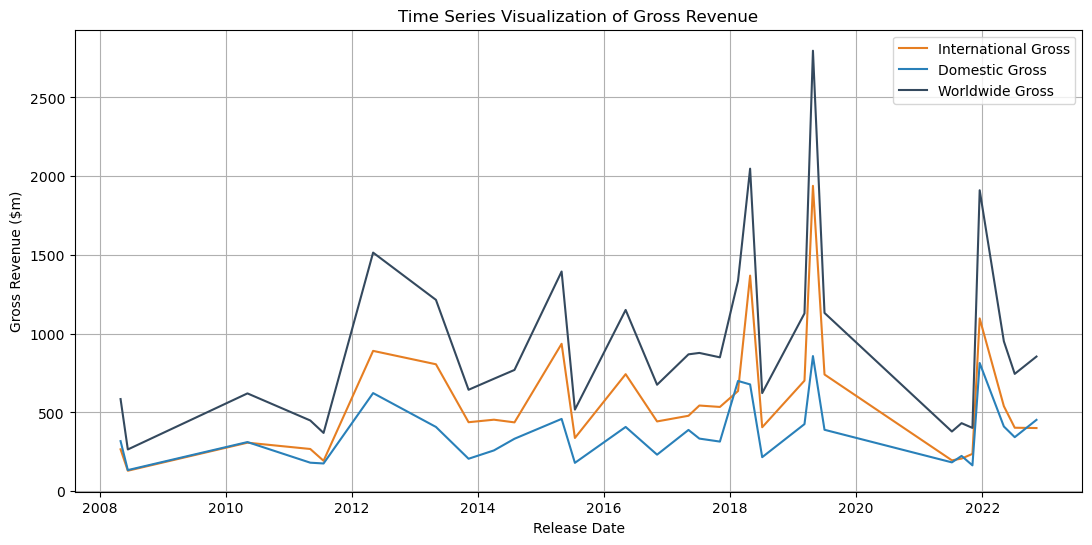

In [58]:
marvel_movies_sorted_date = marvel_movies.set_index('release date')
marvel_movies_sorted_date.sort_index(inplace=True)

# Plotting the time series for gross revenue
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(marvel_movies_sorted_date['international gross ($m)'], color='#e67e22', label='International Gross')
ax.plot(marvel_movies_sorted_date['domestic gross ($m)'], color='#2980b9', label='Domestic Gross')
ax.plot(marvel_movies_sorted_date['worldwide gross ($m)'], color='#34495e', label='Worldwide Gross')

# Adding labels and title
plt.xlabel('Release Date')
plt.ylabel('Gross Revenue ($m)')
plt.title('Time Series Visualization of Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
print(marvel_movies['category'].value_counts())


Unique             5
Avengers           4
Thor               4
Captain America    3
Iron Man           3
Spider-Man         3
Ant-Man            2
Black Panther      2
Dr Strange         2
Guardians          2
Name: category, dtype: int64


# Segmentation and Targeting

# Conjoint Analysis & Memo Section

# Forecasting Total Revenue

# Classification

# Strategic Memo

# A/B Testing

# Conclusions